# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [18]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 100

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.076991938 W= 0.24917892 b= 0.80444944
Epoch: 0200 cost= 0.076991752 W= 0.24922664 b= 0.80410635
Epoch: 0300 cost= 0.076991610 W= 0.24926937 b= 0.80379844
Epoch: 0400 cost= 0.076991446 W= 0.24930654 b= 0.80353147
Epoch: 0500 cost= 0.076991357 W= 0.2493397 b= 0.8032931
Epoch: 0600 cost= 0.076991268 W= 0.24936917 b= 0.80308115
Epoch: 0700 cost= 0.076991186 W= 0.24939615 b= 0.80288714
Epoch: 0800 cost= 0.076991126 W= 0.2494186 b= 0.80272484
Epoch: 0900 cost= 0.076991081 W= 0.24943838 b= 0.8025839
Epoch: 1000 cost= 0.076991029 W= 0.24945627 b= 0.80245507
Optimization Finished!
Training cost= 0.07699103 W= 0.24945627 b= 0.80245507 



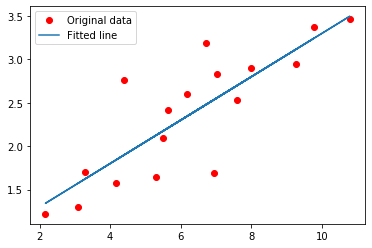

In [19]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Training with $l_2$ Regularization

In [20]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 100

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error, add l2 regularization
alpha = -0.1
regularizer = tf.nn.l2_loss(W)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples) + tf.multiply(alpha,regularizer)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.089189678 W= 0.33216843 b= 0.2955471
Epoch: 0200 cost= 0.090123072 W= 0.33441243 b= 0.28000188
Epoch: 0300 cost= 0.091003507 W= 0.33646673 b= 0.2657718
Epoch: 0400 cost= 0.091831155 W= 0.33834726 b= 0.25274554
Epoch: 0500 cost= 0.092606969 W= 0.34006867 b= 0.24082096
Epoch: 0600 cost= 0.093332425 W= 0.34164447 b= 0.22990538
Epoch: 0700 cost= 0.094009250 W= 0.34308693 b= 0.21991327
Epoch: 0800 cost= 0.094639502 W= 0.3444073 b= 0.21076643
Epoch: 0900 cost= 0.095225453 W= 0.34561607 b= 0.20239349
Epoch: 1000 cost= 0.095769309 W= 0.34672248 b= 0.1947289
Optimization Finished!
Training cost= 0.09576931 W= 0.34672248 b= 0.1947289 



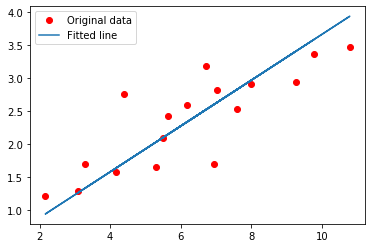

In [21]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Training with Noise on weight Regularization

In [54]:
def add_random_noise(w, mean=0.0, stddev=1e-12):
    variables_shape = tf.shape(w)
    noise = tf.random_normal(
        variables_shape,
        mean = mean,
        stddev = stddev,
        dtype = tf.float32,
    )
    return tf.assign_add(w, noise)

In [55]:
# Parameters
learning_rate = 0.01
training_epochs = 200
training_epochs_noise = 800
display_step = 100

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

################## Construct a linear model ##################
pred = tf.add(tf.multiply(X, W), b)
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

################## Construct a linear model with noise ##################
# add noise on the weight W
pred_noise = tf.add(tf.multiply(X, add_random_noise(W)), b)
# Mean squared error
cost_noise = tf.reduce_sum(tf.pow(pred_noise-Y, 2))/(2*n_samples)
# Gradient descent
optimizer_noise = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_noise)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0100 cost= 0.087668404 W= 0.30753374 b= 0.38464972
Epoch: 0200 cost= 0.085337169 W= 0.3008466 b= 0.43275538
Epoch: 0300 cost= 0.083811671 W= 0.3008466 b= 0.47012523
Epoch: 0400 cost= 0.083601877 W= 0.3008466 b= 0.4838692
Epoch: 0500 cost= 0.083572231 W= 0.3008466 b= 0.48892373
Epoch: 0600 cost= 0.083567753 W= 0.3008466 b= 0.49078256
Epoch: 0700 cost= 0.083566979 W= 0.3008466 b= 0.49146602
Epoch: 0800 cost= 0.083566815 W= 0.3008466 b= 0.4917174
Epoch: 0900 cost= 0.083566748 W= 0.3008466 b= 0.49180996
Epoch: 1000 cost= 0.083566748 W= 0.3008466 b= 0.4918447
Optimization Finished!
Training cost= 0.08356675 W= 0.3008466 b= 0.4918447 



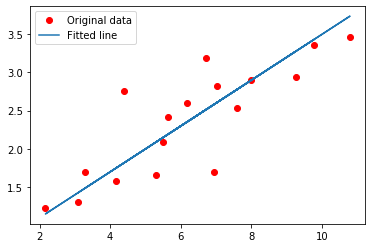

In [56]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data ##################
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            
    # Fit all training data with noise  ##################      
    for epoch in range(training_epochs_noise):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer_noise, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1+training_epochs), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()